Tradução: Gabriel S. Ferrante

# **Convoluções, Blurring (suavização) e Sharpening (aumento de nitidez) em Imagens**

**Nesta aula iremos aprender**
1. Operadores de convolução
2. Blurring
3. Denoising (remoção de ruído)
4. Sharpening

In [1]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



**Primeiro de tudo, precisamos saber o que são filtros de convolução.**

A operação de convolução é uma técnica fundamental em processamento de imagens e redes neurais que envolve a aplicação de um filtro (ou kernel) sobre uma imagem para transformar seus pixels. Essa operação é usada para detectar características específicas, como bordas, detalhes e texturas, ao processar uma imagem.

Na convolução, movemos um kernel (ou filtro) sobre a imagem, calculando um valor para cada pixel da imagem resultante. O kernel é uma pequena matriz, geralmente de tamanho 3x3, 5x5 ou maior, com valores predefinidos que definem a operação desejada (por exemplo, detecção de bordas, suavização).

- Kernel: Uma pequena matriz de pesos que define a operação a ser realizada.
- Deslocamento: O kernel é movido (ou "deslocado") sobre a imagem, um pixel de cada vez.
- Multiplicação e Soma: Em cada posição, cada valor do kernel é multiplicado pelo pixel correspondente na imagem, e os resultados são somados.
- Pixel Resultante: O valor final é atribuído ao pixel correspondente na imagem de saída.

### **Blurring utilizando operadores de convolução**

Ao aplicar esse kernel sobre a imagem, substituímos cada pixel pela média dos seus vizinhos, criando um efeito de suavização ou "blur" (desfoque).

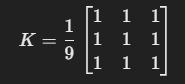 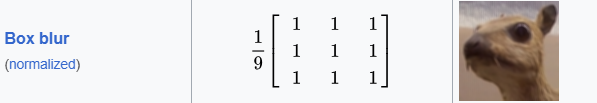

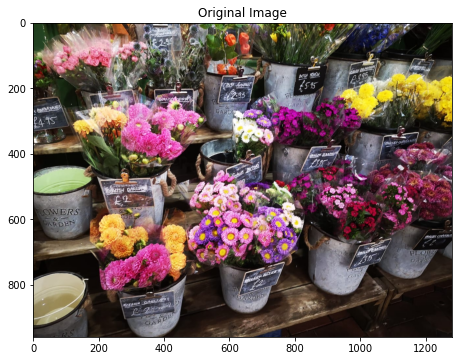

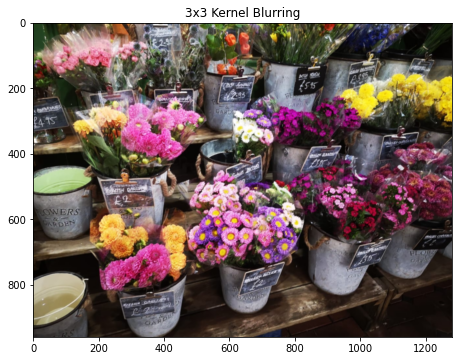

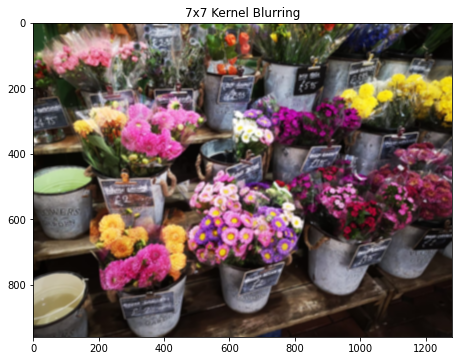

In [ ]:
import cv2
import numpy as np

#leemos uma imagem
image = cv2.imread('images/flowers.jpeg')
imshow('Original Image', image)

# criamso um kernel box blur normalizado de 3x3
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# usamos a função cv2.filter2D, passando a imagem, Profundidade da imagem de saída (-1 mantém a mesma) e o Kernel
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)

#Criando um mesmo kernel mais forte, baseado no Box Blur, ou seja, Usa um kernel de média para desfocar a imagem.
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

### **Outros métodos de blurring comumente utilizados no OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring

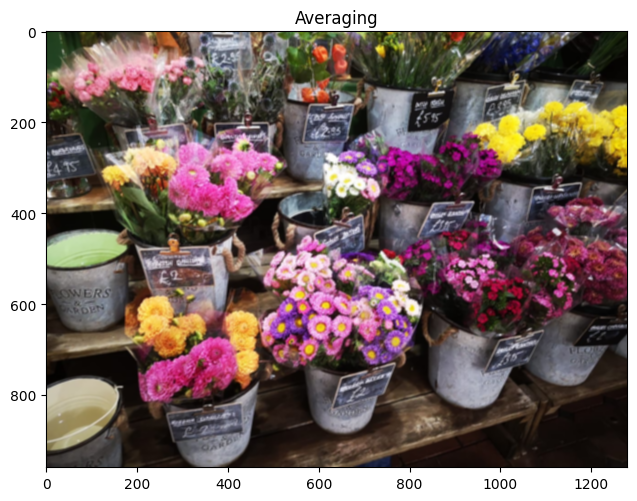

In [4]:
import cv2
import numpy as np

image = cv2.imread('images/flowers.jpeg')

#Também podemos utilizar a função pronta de Blur Box, .blur()
# box blur normalizado, sempre passando um numero impar e positivo
blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)


GaussianBlur kernel 

Função .GaussianBlur()

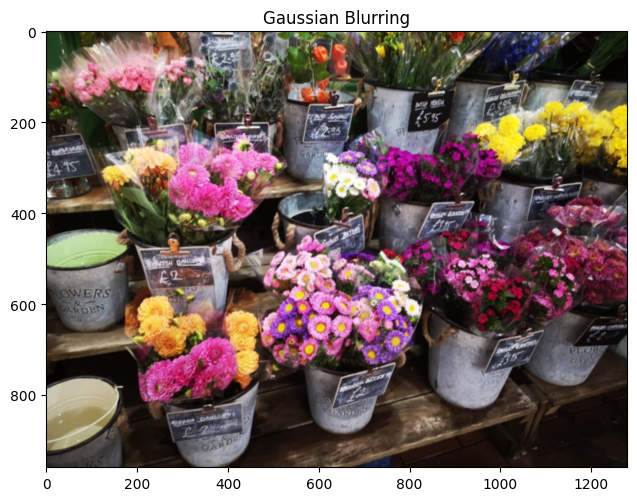

In [5]:

# Parâmetros: Imagem, Kernel size e Desvio padrão na direção X (horizontal). Este valor controla o grau de suavização. Valores maiores aplicam mais desfoque.
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)


MedianBlur Kernel

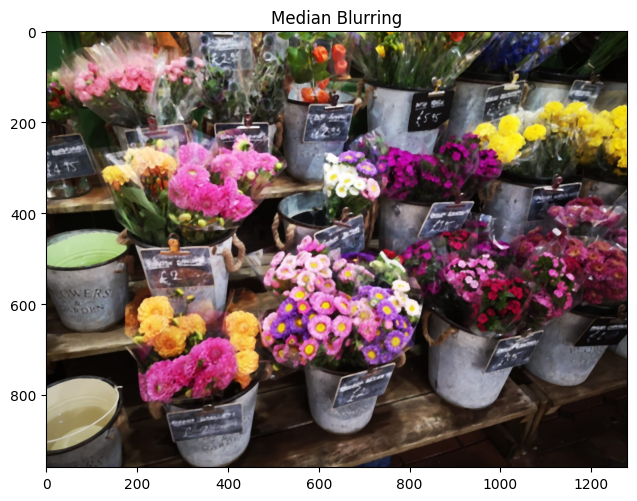

In [ ]:
# Pega a mediana de todos os pixels na área do kernel e central 
# elemento é substituído por este valor mediano
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

### **Bilateral Filter**

O Filtro Bilateral é um filtro de suavização não linear com preservação de bordas que é comumente usado em Visão Computacional como um estágio simples de redução de ruído em um pipeline. Ele calcula a intensidade de cada pixel de saída como uma média ponderada dos valores de intensidade dos pixels próximos na imagem de entrada. Crucialmente,
os pesos dependem não apenas da distância euclidiana entre os pixels atuais e vizinhos, mas também das diferenças radiométricas (por exemplo, diferenças de intensidade de cor) entre eles. O resultado é que as bordas são preservadas enquanto regiões com intensidades semelhantes são suavizadas.

- Como Funciona o Filtro Bilateral
- - O filtro bilateral leva em consideração tanto a distância espacial quanto a diferença de intensidade entre pixels ao aplicar o desfoque. Ele é baseado em dois componentes:

- Filtro Gaussiano Espacial: Controla o desfoque em função da distância entre os pixels. Assim, pixels mais próximos contribuem mais para o desfoque do que pixels distantes.
- Filtro Gaussiano de Intensidade: Controla o desfoque com base na diferença de intensidade dos pixels. Pixels com intensidades similares contribuem mais para o desfoque, enquanto pixels com intensidades muito diferentes (como bordas) são menos afetados.

#### ```dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])```
- **src**	Fonte de imagem de 8 bits ou ponto flutuante, 1 canal ou 3 canais.

- **d**	Diâmetro de cada vizinhança de pixel usada durante a filtragem. Se não for positivo, é calculado a partir do sigmaSpace.

- **sigmaColor**	Controle de intensidade do filtro Gaussiano para diferença de intensidade. Um valor maior do parâmetro significa que cores mais distantes dentro da vizinhança de pixels (ver sigmaSpace) serão misturadas, resultando em áreas maiores de cores semi-iguais.

- **sigmaSpace**	Controle de intensidade do filtro Gaussiano espacial para a distância entre os pixels. Um valor maior do parâmetro significa que pixels mais distantes influenciarão uns aos outros, desde que suas cores estejam próximas o suficiente (veja sigmaColor ). Quando d>0, especifica o tamanho da vizinhança independente do sigmaSpace. Caso contrário, d é proporcional ao sigmaSpace.

- **dst**	Imagem de destino do mesmo tamanho e tipo que src .

- **borderType**	modo de borda usado para extrapolar pixels fora da imagem

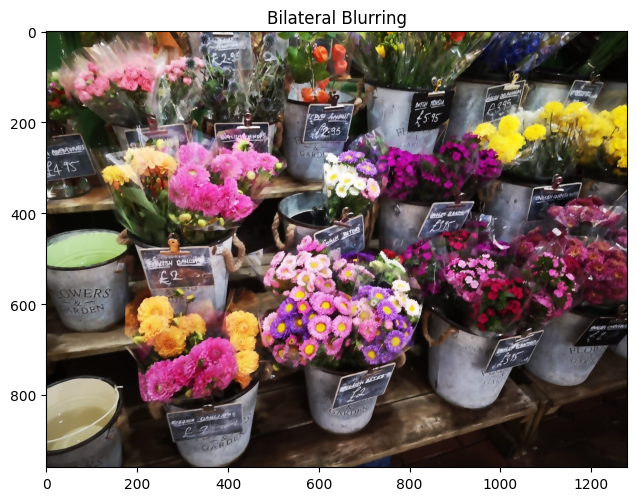

In [8]:
# Implementação
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)

## **Eliminação de ruído de imagem - Non-Local Means Denoising**

**Temos 4 variaões de Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - funciona com uma única imagem em tons de cinza
- cv2.fastNlMeansDenoisingColored() - Para imagens coloridas
- cv2.fastNlMeansDenoisingMulti() - trabalha com sequência de imagens capturadas em curto período de tempo (imagens em tons de cinza)
- cv2.fastNlMeansDenoisingColoredMulti() - O mesmo de cima, só que para imagens coloridas

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

#### Parâmetros do fastNlMeansDenoisingColored:	

- **src** – Imagem de entrada de 3 canais de 8 bits.

- **dst** – Imagem de saída com o mesmo tamanho e tipo de src .

- **h** – Parâmetro que regula a intensidade do filtro para componente de luminância. Um valor h maior remove perfeitamente o ruído, mas também remove detalhes da imagem, um valor h menor preserva detalhes, mas também preserva algum ruído.

- **hColor** – O mesmo que h, mas para componentes de cor. Para a maioria das imagens, o valor igual a 10 será suficiente para remover o ruído colorido e não distorcer as cores.

- **templateWindowSize** – Tamanho em pixels do patch do modelo usado para calcular pesos. Deveria ser estranho. Valor recomendado 7 pixels
- **searchWindowSize** – Tamanho em pixels da janela usada para calcular a média ponderada para determinado pixel. Deveria ser estranho. Afeta o desempenho linearmente: maior

searchWindowsSize - maior tempo de remoção de ruído. Valor recomendado 21 pixels



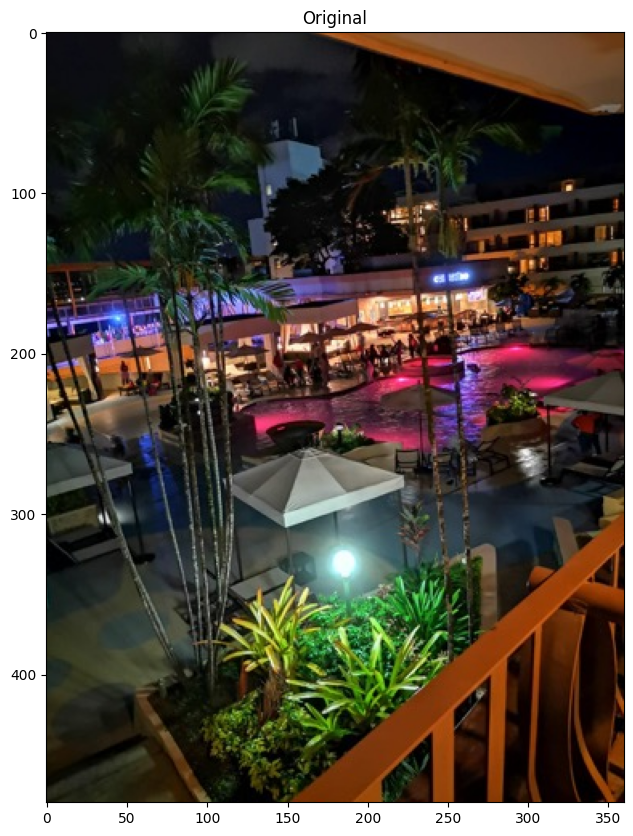

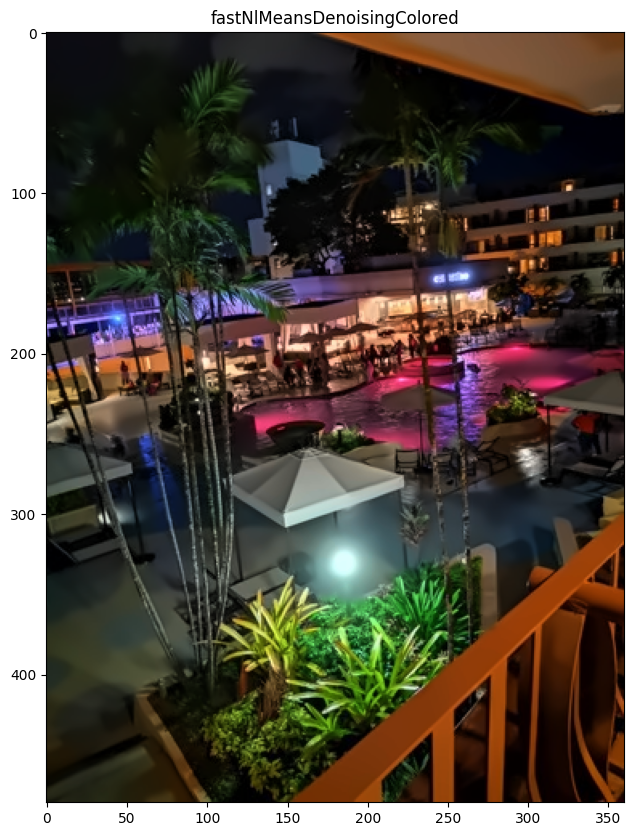

In [10]:
image = cv2.imread('images/hilton.jpeg')
imshow('Original', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst)

### **Sharpening (aumento de nitidez) em  imagens**

Refere-se ao processo de aumentar o contraste e a definição de detalhes em uma imagem, tornando bordas e características mais pronunciadas. Esse processo é frequentemente usado em edição de imagens para melhorar a clareza e a percepção visual. Muito comum no processo de HDR.

Como Funciona o Sharpening
- O sharpening é geralmente realizado através de operações de convolução, onde um kernel de realce é aplicado à imagem. O kernel é uma matriz que define como os valores dos pixels devem ser ajustados para aumentar a nitidez.

Um kernel típico para sharpening pode ser algo como:

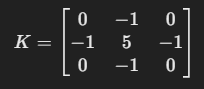

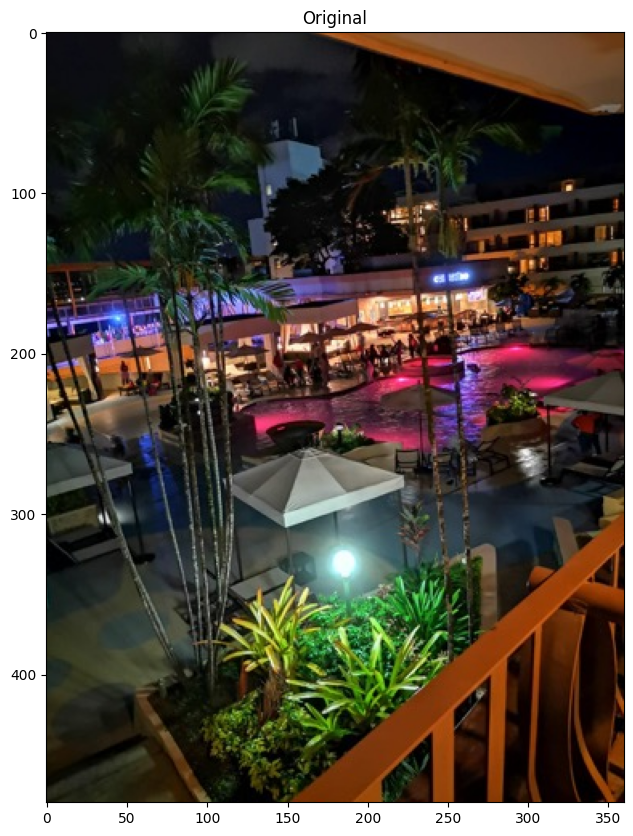

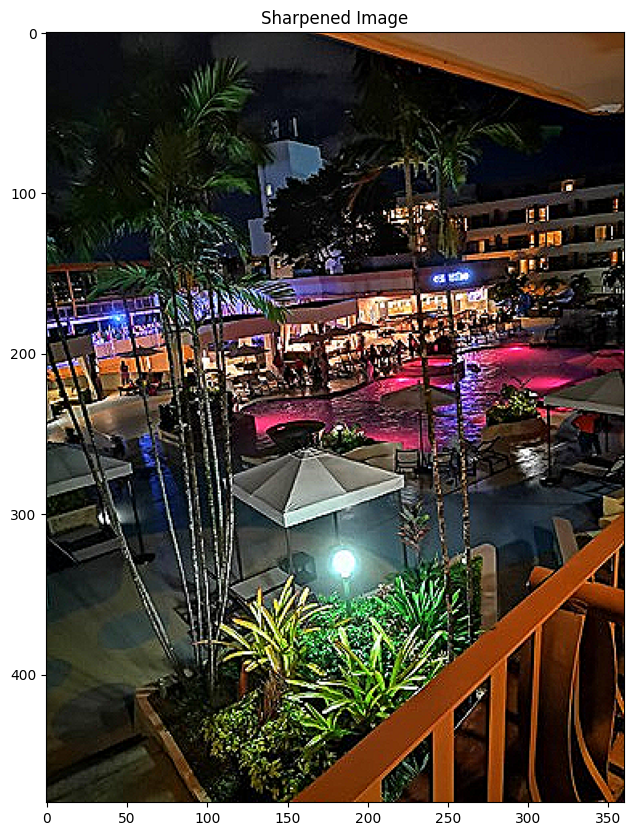

In [ ]:
# 
image = cv2.imread('images/hilton.jpeg')
imshow('Original', image)

# lembre-se que a soma deve dar 1. 
# 
# -1 * 8 = -8 
# -8 + 9 = 1
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)